In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


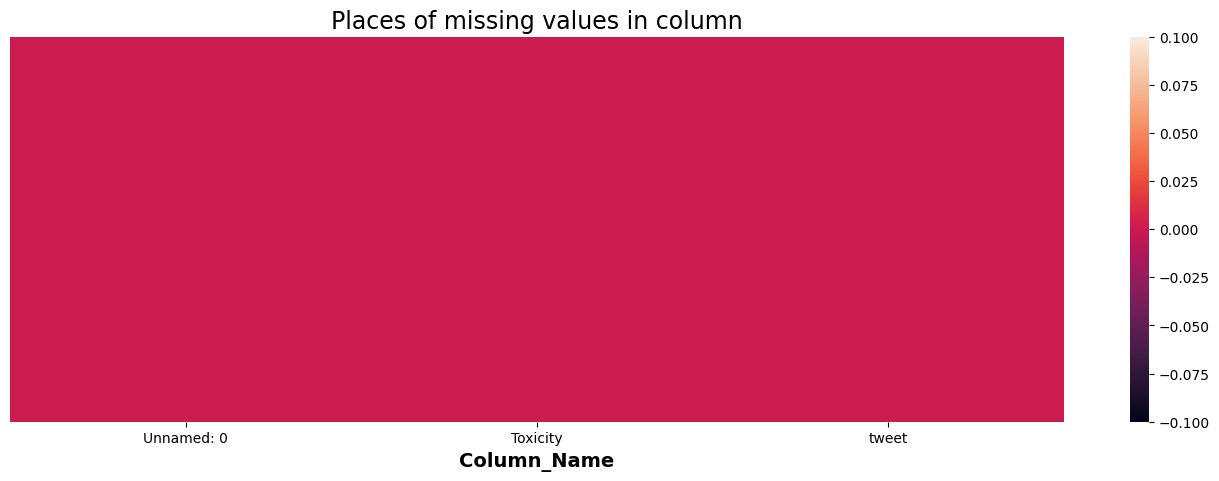

In [ ]:
df1 = pd.read_csv(r'/content/drive/MyDrive/SMA Practical Exam/Generate Word cloud generation/FinalBalancedDataset (1).csv')
df1=df1.drop_duplicates("tweet")
df1.shape
df1.head
# df1.date.value_counts()
#Heat Map for missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df1['Toxicity'].value_counts().head (10)
print(Top_Location_Of_tweet)
def get_subjectivity(text):
 return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
 return TextBlob(text).sentiment.polarity
df1['subjectivity']=df1[ 'tweet'].apply(get_subjectivity)
df1[ 'polarity' ]=df1[ 'tweet'].apply(get_polarity)
df1.head()

Toxicity
0    30389
1    23924
Name: count, dtype: int64


,Unnamed: 0,Toxicity,tweet,subjectivity,polarity
0,0,0,@user when a father is dysfunctional and is s...,1.0,-0.500000
1,1,0,@user @user thanks for #lyft credit i can't us...,0.2,0.200000
2,2,0,bihday your majesty,0.0,0.000000
3,3,0,#model i love u take with u all the time in ...,0.6,0.976562
4,4,0,factsguide: society now #motivation,0.0,0.000000


## **2. Sentiment Analysis**


<Axes: title={'center': 'Sentiment Analysis'}, ylabel='textblob_sentiment'>

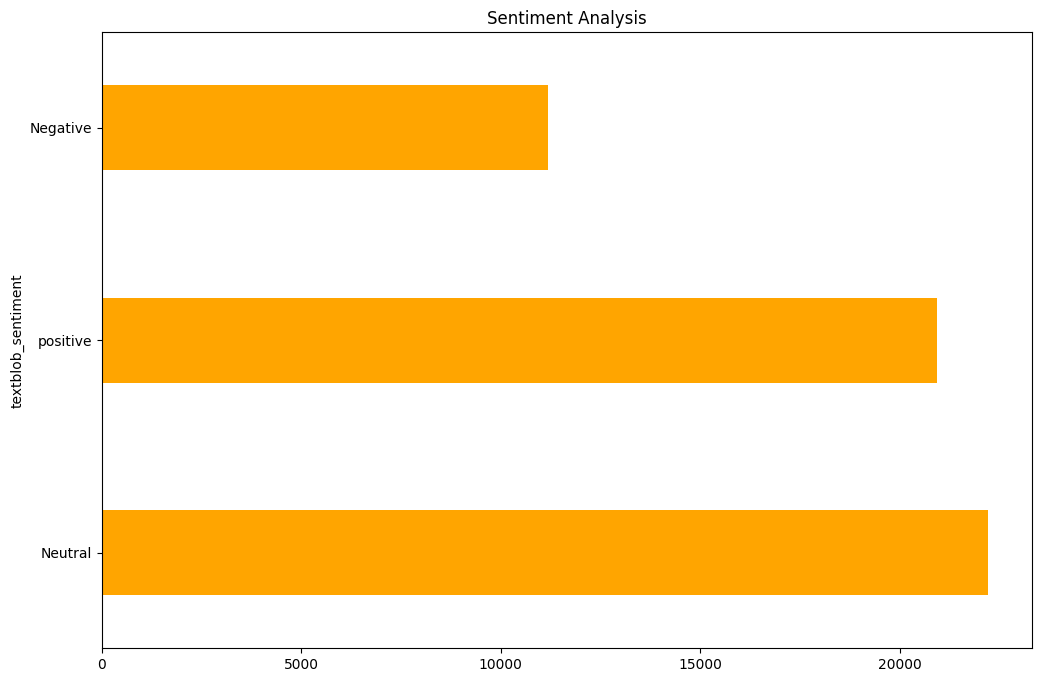

In [ ]:
df1['textblob_score'] =df1[ 'tweet'].apply(lambda x:
TextBlob(x).sentiment.polarity)
neutral_threshold=0.05
df1['textblob_sentiment']=df1[ 'textblob_score'].apply(lambda c:'positive' if c >=
neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )
textblob_df = df1[['tweet','textblob_sentiment','Toxicity']]
textblob_df
textblob_df["textblob_sentiment"].value_counts()
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]
df_very_positive=df_positive[df_positive['Toxicity']>0]
df_very_positive.head()
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]
df_negative
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]
df_neutral


,tweet,textblob_sentiment,Toxicity
2,bihday your majesty,Neutral,0
4,factsguide: society now #motivation,Neutral,0
6,@user camping tomorrow @user @user @user @use...,Neutral,0
12,i get to see my daddy today!! #80days #getti...,Neutral,0
13,@user #cnn calls #michigan middle school 'buil...,Neutral,1
...,...,...,...
56728,you just want some attention hoe,Neutral,1
56732,you look like AC Green...bitch don't call here...,Neutral,1
56734,you might as well gone pussy pop on a stage,Neutral,1
56735,you niggers cheat on ya gf's? smh....,Neutral,1


## **3. Visualization by creating a Word Cloud**


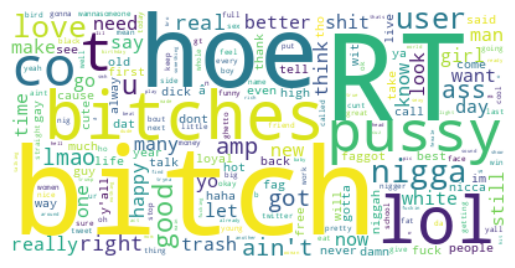

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#Creating the text variable
positive_tw =" ".join(t for t in df_very_positive.tweet)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(positive_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

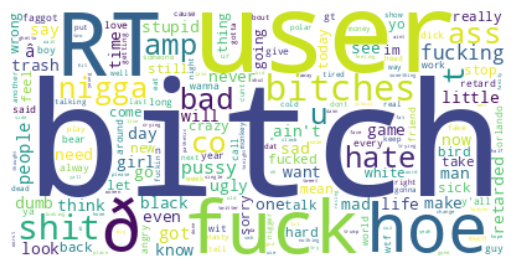

In [ ]:
#Creating the text variable
negative_tw =" ".join(t for t in df_negative.tweet)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(negative_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

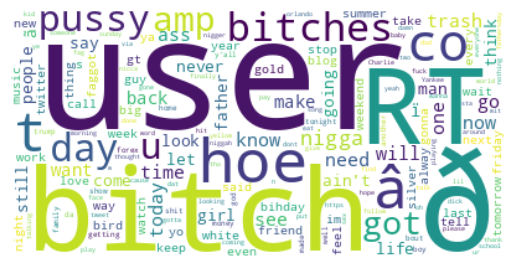

In [ ]:
#Creating the text variable
neutral_tw =" ".join(t for t in df_neutral.tweet)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(neutral_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()